# Importing Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import os

# Merging Sales Data Together In Single Csv File

### Loading Datasets

In [7]:
df = pd.read_csv('./dataset/Sales_January_2019.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Loading all 12 months files

In [21]:
files =  os.listdir('./dataset')

dataset = pd.DataFrame()

for file in files:
    twelve_months_data = pd.read_csv('./dataset/'+file)
    dataset = pd.concat([dataset, twelve_months_data])
    
    dataset.to_csv('all_twelve_months_data.csv', index = False)

#### Load The Updated Dataframe

In [24]:
salesData = pd.read_csv('all_twelve_months_data.csv')

salesData.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

In [25]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


######  Drop NAN Data

In [26]:
salesData.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [27]:
nanData = salesData[salesData.isna().any(axis=1)]
nanData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
nanData.shape

(545, 6)

In [32]:
salesData = salesData.dropna(how = 'all')

###### Remove characters from 'Order Date' Column

In [33]:
findChar= salesData[salesData['Order Date'].str[0:2] == 'Or']
findChar.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [34]:
salesData= salesData[salesData['Order Date'].str[0:2] != 'Or']

###### Change DataType

In [35]:
salesData['Quantity Ordered'] = pd.to_numeric(salesData['Quantity Ordered'])
salesData['Price Each'] = pd.to_numeric(salesData['Price Each'])

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Adding Additional Columns

###### Add Month Column

In [36]:
salesData['Date By Month'] = salesData['Order Date'].str[0:2]
salesData['Date By Month'] = salesData['Date By Month'].astype('int32')
salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


###### Add Column Which Calculate Total Sales in a day

In [37]:
salesData['Total Sales'] = salesData['Quantity Ordered'] * salesData['Price Each']
salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


###### Split City & State From Adderss In a New Column

In [38]:
def getCity(address):
    return address.split(",")[1]

def getState(address):
    return address.split(",")[2]

salesData['City'] = salesData['Purchase Address'].apply(lambda x: getCity(x))
salesData['State'] = salesData['Purchase Address'].apply(lambda x: getState(x))

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Total Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001


# Data Exploration

### What was the best month for sales? How much was earned that month?

In [39]:
BestMonthSales = salesData.groupby('Date By Month').sum()
BestMonthSales.head(12)

,Quantity Ordered,Price Each,Total Sales
Date By Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<Figure size 640x480 with 0 Axes>

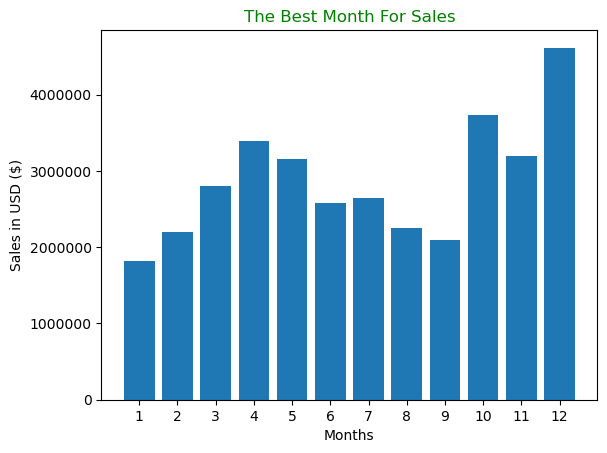

<Figure size 640x480 with 0 Axes>

In [40]:
monthsLabel = range(1,13)

plt.bar(monthsLabel, BestMonthSales['Total Sales'])
plt.xticks(monthsLabel)
plt.ticklabel_format(style = 'plain')
plt.title('The Best Month For Sales', color='green')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.figure()

### What city has the highest number of sales?

In [53]:
SalesInCity = salesData.groupby('City').sum()
SalesInCity

,Quantity Ordered,Price Each,Date By Month,Total Sales,Hour,Minute
City,,,,,,
Atlanta,16602,2779908.20,104794,2795498.58,214264,442932
Austin,11153,1809873.61,69829,1819581.75,141946,289060
Boston,22528,3637409.77,141112,3661642.01,288225,590442
Dallas,16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles,33289,5421435.23,208325,5452570.80,427444,866638
New York City,27932,4635370.83,175741,4664317.43,357696,733598
Portland,14053,2307747.47,87765,2320490.61,179632,368389
San Francisco,50239,8211461.74,315520,8262203.91,643265,1319477
Seattle,16553,2733296.01,104941,2747755.48,213292,436368


<Figure size 640x480 with 0 Axes>

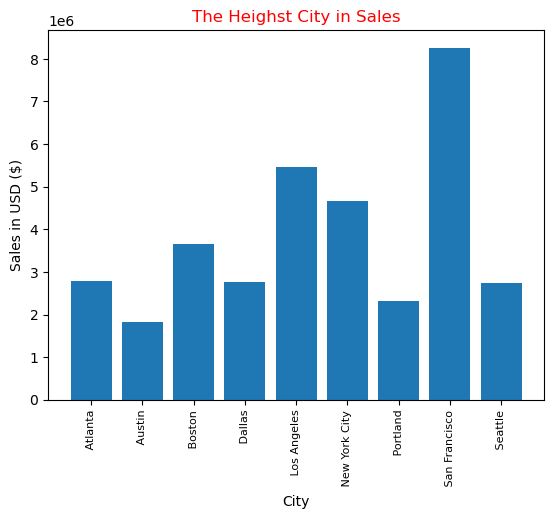

<Figure size 640x480 with 0 Axes>

In [57]:
cities= [city for city, df in salesData.groupby('City')]

plt.bar(cities, SalesInCity['Total Sales'])
plt.xticks(CityLabel, rotation='vertical', size=8)
plt.title('The Heighst City in Sales', color='Red')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.figure()

### what time should we display advertisments to maximize likelihood of customer's buying product?

In [45]:
salesData['Order Date'] = pd.to_datetime(salesData['Order Date'])

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Total Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,9,27


In [46]:
salesData['Hour'] = salesData['Order Date'].dt.hour
salesData['Minute'] = salesData['Order Date'].dt.minute

salesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date By Month,Total Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,9,27


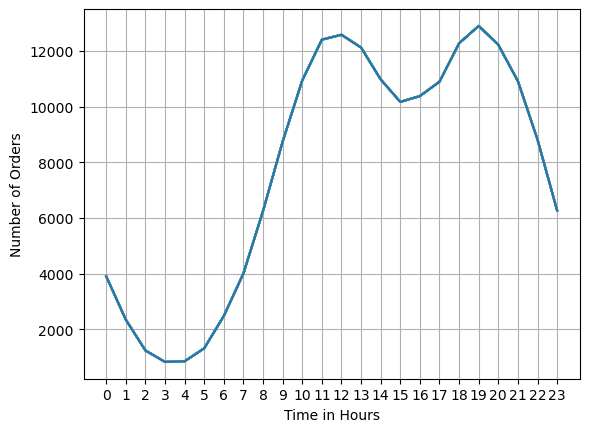

In [47]:
hours = [hour for hour, df in salesData.groupby('Hour')]

plt.plot(hours, salesData.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Time in Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#  12 AM & 7 PM is the best time to display advertisments

### What Products sold the most? Why do you think it sold the most?

<Figure size 640x480 with 0 Axes>

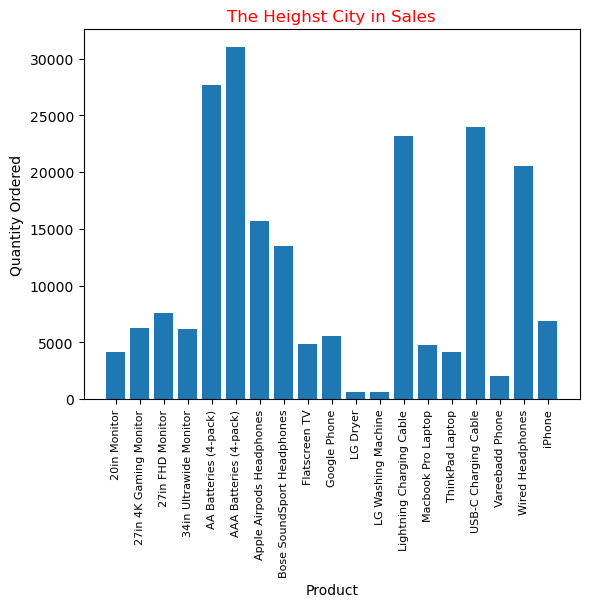

<Figure size 640x480 with 0 Axes>

In [48]:
productGroup = salesData.groupby('Product')
quantityOrdered = productGroup.sum()['Quantity Ordered']
products = [products for products, df in productGroup]
plt.bar(products, quantityOrdered)
plt.xticks(products, rotation='vertical', size=8)
plt.title('The Heighst City in Sales', color='Red')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.figure()

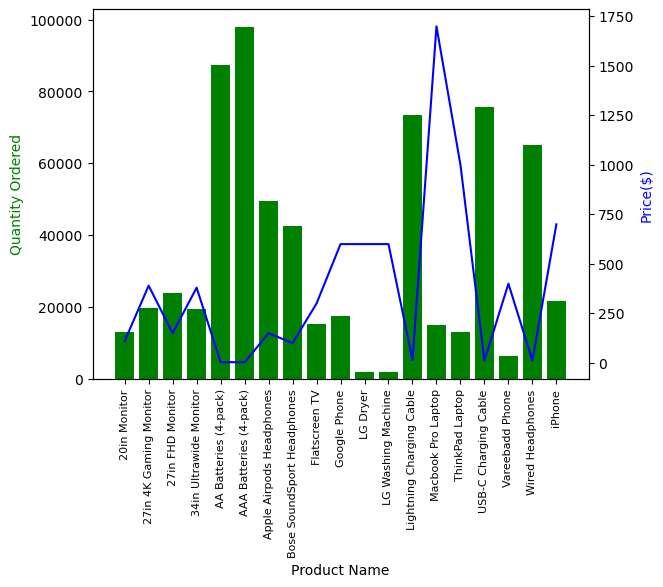

In [24]:
#why this product sold the most
prices = salesData.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantityOrdered,color='g')
ax2.plot(products,prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price($)',color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

In [49]:
salesData.to_csv('outputData.csv')